Code adapted from Zack Fizell

In [10]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## $m_2a = - \frac{Gm_1m_2}{r^2}$ 
## We can rewrite this as:
## * $\dot{x} = \frac{dx}{dt} = v_x$
## * $\ddot{x} = \frac{d^2x}{dt^2} = \frac{dv_x}{dt} = -\frac{GM_E}{r^{3}}x$

In General

## * $\vec{\dot{u}} = \vec{v}$
## * $\vec{\ddot{u}} = -\frac{GM_E}{r^{3}}\vec{u}$


## Complete the function below where we will treat state as a vector containing 6 elements:

## $$state = [x,y,z,v_x,v_y,v_z]$$

In [2]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    x_ddot = -mu*state[0]/(x**2+y**2+z**2)**(3/2)
    y_ddot = -mu*state[1]/(x**2+y**2+z**2)**(3/2)
    z_ddot = -mu*state[2]/(x**2+y**2+z**2)**(3/2)
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

## We will look at the orbit of the Internation Space Station. The initial conditons are defined below

In [3]:
# Initial Conditions / ISS
X_0 = -2775.03475
Y_0 = 4524.24941
Z_0 = 4207.43331
VX_0 = -3.641793088
VY_0 = -5.665088604
VZ_0 =  3.679500667

 ### 1. Create an crete an initial state vector called $\it{\mathrm{state\_0}}$ array containing the initial position and veolcity information.
 ### 2. Then define a time array using $\it{\mathrm{linspace}}$ that starts at 0s and covers 21,600s containing 2000 points 
 ### 3. Use Scipy's $\it{\mathrm{integrate.solve\_ivp}}$ to solve the ODEs

In [12]:
state_0 = (X_0,Y_0,Z_0,VX_0,VY_0,VZ_0)
time_array = np.linspace(0, 21600.0, 2000)
sol_RK45 = integrate.solve_ivp(model_2BP,(time_array[0],time_array[-1]),state_0,method='DOP853', t_eval=time_array)
print(sol_RK45)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.081e+01 ...  2.159e+04  2.160e+04]
        y: [[-2.775e+03 -2.814e+03 ... -1.808e+02 -2.328e+02]
            [ 4.524e+03  4.463e+03 ...  6.645e+03  6.631e+03]
            ...
            [-5.665e+00 -5.727e+00 ... -1.266e+00 -1.358e+00]
            [ 3.680e+00  3.621e+00 ...  5.844e+00  5.826e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 254
     njev: 0
      nlu: 0


# Analyze the Results

Make plots of X vs. time
1. X vs. time, Y vs, time, Z vs. time
2. X vs. Y, X vs. Z, Y vs. Z


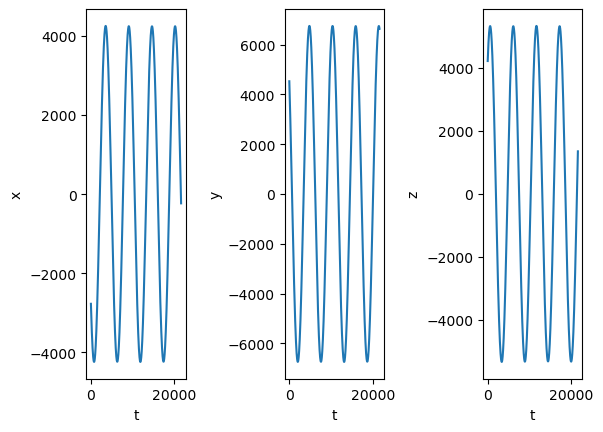

In [16]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3)

plt.subplots_adjust(wspace=1)

ax1.plot(time_array,sol_RK45.y[0])
ax1.set_xlabel('t')
ax1.set_ylabel('x')

ax2.plot(time_array,sol_RK45.y[1])
ax2.set_xlabel('t')
ax2.set_ylabel('y')

ax3.plot(time_array,sol_RK45.y[2])
ax3.set_xlabel('t')
ax3.set_ylabel('z')

plt.show()

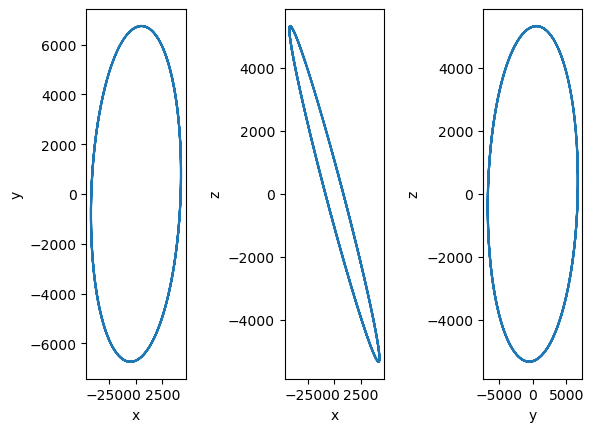

In [15]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3)

plt.subplots_adjust(wspace=1)

ax1.plot(sol_RK45.y[0],sol_RK45.y[1])
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(sol_RK45.y[0],sol_RK45.y[2])
ax2.set_xlabel('x')
ax2.set_ylabel('z')

ax3.plot(sol_RK45.y[1],sol_RK45.y[2])
ax3.set_xlabel('y')
ax3.set_ylabel('z')

plt.show()

# 3D Plot

Make a 3D plot showing the 3D trajectory of the ISS


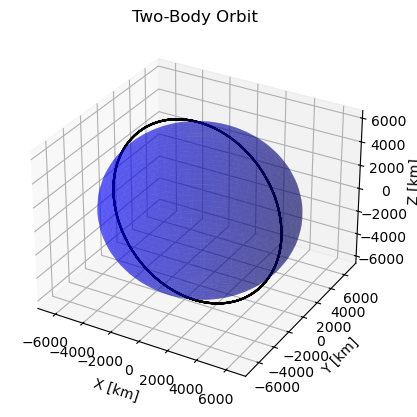

In [18]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(sol_RK45.y[0], sol_RK45.y[1], sol_RK45.y[2], 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');
